In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.


Conclusion: CMO Recommendations; provide data-driven recommendations/suggestions to your CMO using visualization.

In [404]:
marketing_data = pd.read_csv('marketing_data.csv')

In [405]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Content:

The data set marketing_data.csv consists of 2,240 customers of XYZ company with data on:

Customer profiles,
Product preferences,
Campaign successes/failures,
Channel performance,

Description to the columns:
    
1. ID - Unique customer id

2. Year_Birth - DOB of customer

3. Education - Latest education qualification of customer

4. Marital_Status - Married/Single

5. Income - Houshold Annual income

6. Kidhome - Number of children in household

7. Teenhome - Number of teenagers in household

8. Dt_Customer - Date of enrolled in the company

9. Recency - Number of days since customers' last purchase

10. MntWines - Amount spent on wines since last 2 years

11. MntFruits - Amount spent on fruits since last 2 years

12. MntMeatProducts - Amount spent on Meat since last 2 years

13. MntFishProducts - Amount spent on Fish since last 2 years

14. MntGoldProds - Amount spent on Gold since last 2 years

15. MntSweetProducts - Amount spent on Sweet since last 2 years

16. NumDealsPurchases - Number of deals made with a discount

17. NumWebPurchases - Number of purchases made through company website

18. NumCatalogPurchases - Number of purchases using catalogues

19. NumStorePurchases - Number of purchases made directly in stores

20. NumWebVisitsMonth - Number of visits to website in last month

21. AcceptedCmp1 - whether customer accepted the offer in 1st campaign

22. AcceptedCmp2 - whether customer accepted the offer in 2nd campaign

23. AcceptedCmp3 - whether customer accepted the offer in 3rd campaign

AcceptedCmp4 - whether customer accepted the offer in 4th campaign

24. AcceptedCmp5 - whether customer accepted the offer in 5th campaign

25. Response - Whether customer accepted the offer in the last campaign

26. Complain - Whether customer raises a complaint in last 2 years

27.Country - Country where customer belongs to

#### Inspecting and cleaning the marketing data

In [406]:
marketing_data.shape

(2240, 28)

In [407]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [408]:
#Any missing values?
nan_df = marketing_data[marketing_data.isna().any(axis=1)]

In [409]:
nan_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [410]:
marketing_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Income column has 24 missing value and white space

In [411]:
for i in marketing_data[' Income ']:
    print(i)

$84,835.00 
$57,091.00 
$67,267.00 
$32,474.00 
$21,474.00 
$71,691.00 
$63,564.00 
$44,931.00 
$65,324.00 
$65,324.00 
$81,044.00 
$62,499.00 
$67,786.00 
$26,872.00 
$4,428.00 
$54,809.00 
$54,809.00 
$32,173.00 
$47,823.00 
$30,523.00 
$36,634.00 
$43,456.00 
$40,662.00 
$49,544.00 
$57,731.00 
$33,168.00 
$54,450.00 
$54,450.00 
$35,340.00 
$73,170.00 
$65,808.00 
$79,529.00 
$34,578.00 
$46,374.00 
$18,351.00 
$95,169.00 
$65,370.00 
$39,228.00 
$84,865.00 
$61,314.00 
$21,359.00 
$66,465.00 
$81,698.00 
$39,146.00 
$25,959.00 
$64,260.00 
$32,300.00 
$74,806.00 
$72,967.00 
$48,904.00 
$14,796.00 
$66,991.00 
$52,195.00 
$90,369.00 
$18,393.00 
$47,139.00 
$38,576.00 
$61,905.00 
$83,715.00 
$60,597.00 
$6,560.00 
$48,330.00 
$38,236.00 
$22,701.00 
$53,367.00 
$34,728.00 
$63,915.00 
$82,504.00 
$38,578.00 
$38,578.00 
$79,174.00 
$81,975.00 
$43,263.00 
$27,242.00 
$76,445.00 
$75,276.00 
$34,213.00 
$72,335.00 
$79,143.00 
$27,469.00 
$68,695.00 
$68,695.00 
$50,388.00 
$77,62

To remove the white space before and after the Income column

In [412]:
import re

In [413]:
marketing_data.columns = marketing_data.columns.str.replace(' ', '')

In [414]:
marketing_data['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

Transforming Income column to numerical and not including the dollar sign ($)

In [415]:
marketing_data['Income'] = marketing_data['Income'].str.replace('$', '')
marketing_data['Income'] = marketing_data['Income'].str.replace(',', '').astype('float')

In [416]:
marketing_data['Income'].value_counts()

7500.0     12
35860.0     4
48432.0     3
46098.0     3
37760.0     3
           ..
26228.0     1
52973.0     1
78028.0     1
63967.0     1
6560.0      1
Name: Income, Length: 1974, dtype: int64

In [417]:
marketing_data['Income'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

In [418]:
#import seaborn as sns
#plt.figure(figsize=(12, 7))
#sns.boxplot(x="Response", y="Income", data=marketing_data, palette="winter")

In [419]:
#Visualizing the boc plot of the income based on those who responded or not. So we can impute the missing income values by 
# by utiliizng the average for each class.

In [420]:
#marketing_data.dropna(how='all', inplace=True)

In [421]:
marketing_data.dropna(inplace=True)

In [422]:
# A clean dataset without missing values

marketing_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [423]:
marketing_data['Dt_Customer']

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2216, dtype: object

In [424]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'])

In [425]:
marketing_data['Children'] = marketing_data['Kidhome'] + marketing_data['Teenhome']

In [426]:
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,1
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,0


Build correlation matrix

In [427]:
marketing_data_corr = marketing_data.corr()
marketing_data_corr.style.background_gradient(cmap='PuBu')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Children
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,-0.021491,0.034154,-0.000957
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,0.023692,-0.030407,-0.087398
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,0.133047,-0.027225,-0.293352
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,-0.077909,0.040978,0.687794
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,-0.153901,0.003307,0.697907
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,-0.199766,0.013637,0.018290
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,0.246299,-0.039470,-0.353748
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,0.122443,-0.005324,-0.395901
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,0.237746,-0.023782,-0.504545
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,0.108145,-0.021220,-0.427841


   ### Exploratory Data Analysis on customer relationship management
   
CRM: This will help to identify this company's profitable customers and tune its offers to increase profitability and also help identify sales opportunities.

Customer profiling and behavioural analysis

In [429]:
marketing_data['Age'] = 2021 - marketing_data['Year_Birth']

In [430]:
marketing_data_df = marketing_data.groupby(['Age'])['Income'].mean().reset_index()

In [431]:
marketing_data_df.nlargest(5, 'Income')

,Age,Income
54,80,93027.000000
2,27,85449.333333
57,122,83532.000000
3,28,74139.800000
51,76,70375.375000


The senior citizens of over 80 years old are the highest earners, followed by 27 years old customers.

In [432]:
marketing_data_df.nsmallest(10, 'Income')

,Age,Income
0,25,10960.500000
56,121,36640.000000
12,37,39132.789474
11,36,39192.937500
6,31,40919.277778
7,32,42250.172414
10,35,43346.414634
17,42,44956.528302
18,43,46012.434211
9,34,46888.666667


The least earners are 25 years old customers

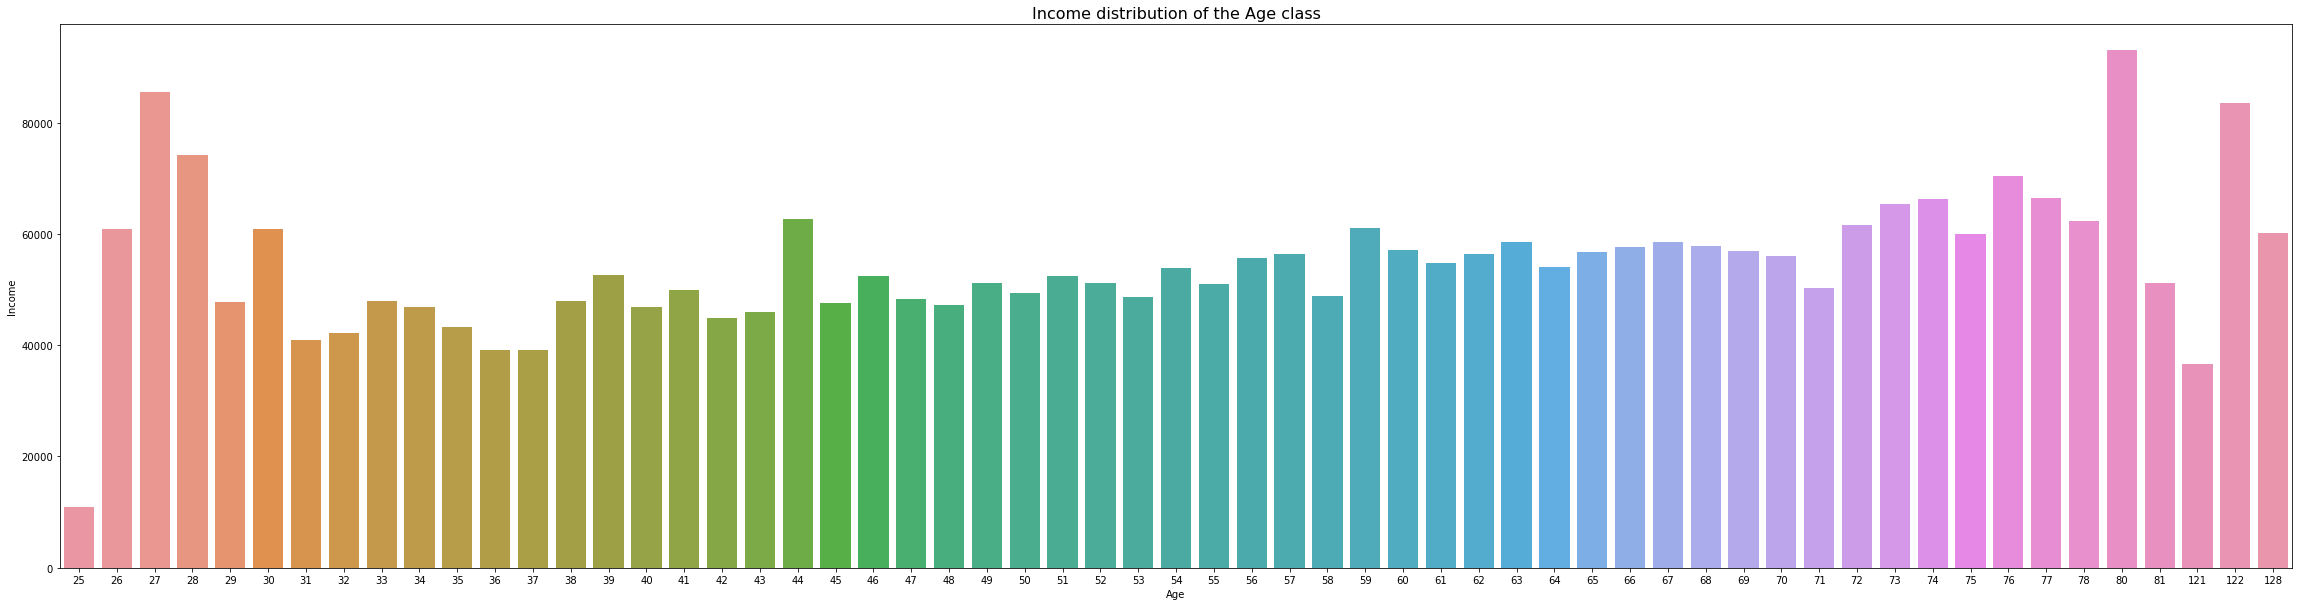

In [433]:
plt.figure(figsize=(40,10))
sns.barplot(x = 'Age', y = 'Income', data = marketing_data_df)
plt.title('Income distribution of the Age class', size=16)
plt.show()

The target group highest earners are the senior citizens, 80 years old, followed by 27 years old, and the lowest earners are the 25 years old customers

In [434]:
Snr_market = marketing_data[marketing_data['Age']==80]

In [435]:
Snr_market.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,0,0,1,0,0,0,0,SP,0,80


Education Class against Income feature

In [436]:
marketing_data1 = marketing_data.groupby(['Education'])['Income'].mean().reset_index()

In [437]:
round(marketing_data1.nlargest(4, 'Income'))

,Education,Income
4,PhD,56145.0
3,Master,52918.0
2,Graduation,52720.0
0,2n Cycle,47633.0


In [438]:
round(marketing_data1.nsmallest(3, 'Income'))

,Education,Income
1,Basic,20306.0
0,2n Cycle,47633.0
2,Graduation,52720.0


The highest earners are PhD holdres with 56145 dollars, followed by Masters holders, and the least earners are the Basic class.

<AxesSubplot:xlabel='Education', ylabel='Income'>

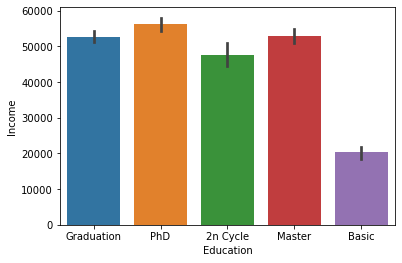

In [439]:
sns.barplot(x = 'Education', y = 'Income', data = marketing_data)

Marital_status class with Income

In [440]:
marketing_data2 = marketing_data.groupby(['Marital_Status'])['Income'].mean().reset_index()

In [441]:
marketing_data2.nlargest(5, 'Income')

,Marital_Status,Income
0,Absurd,72365.500000
6,Widow,56481.552632
5,Together,53245.534031
2,Divorced,52834.228448
3,Married,51724.978996


In [442]:
round(marketing_data2.nsmallest(3, 'Income'))

,Marital_Status,Income
1,Alone,43789.0
7,YOLO,48432.0
4,Single,50995.0


The highest earners in Marital status class are the Absurd, followed by the widows, the divorced and the lowest earners are the Alone class. 

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

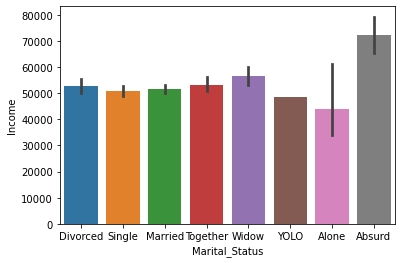

In [443]:
sns.barplot(x = 'Marital_Status', y = 'Income', data = marketing_data)

Total number of customers in countries

Text(0, 0.5, 'Total number of customers')

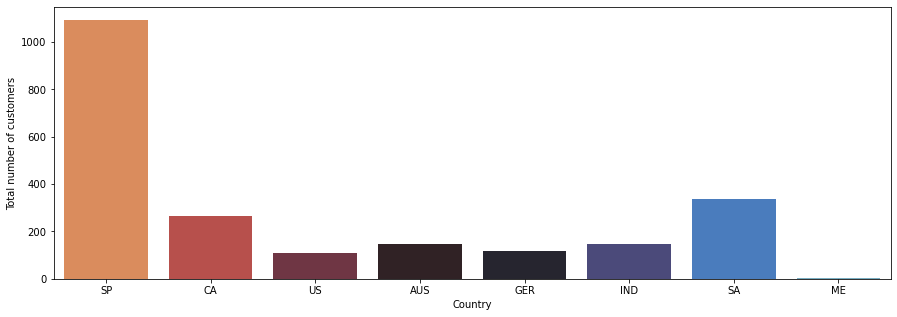

In [444]:
plt.figure(figsize = (15, 5))
sns.countplot(x = marketing_data['Country'], palette = 'icefire_r')
plt.ylabel('Total number of customers')

#### Level of cash flow by customers purchases (Total Spent in two years on goods)

Real-time sales analysis - knowing what is bought, by whom, where, how often and when, a business can match supply more accurately with demand and reduce wasted capacity or store.

In [445]:
 # Names of products purchased:
    
# MntWines - Amount spent on wines since last 2 years

# MntFruits - Amount spent on fruits since last 2 years

# MntMeatProducts - Amount spent on Meat since last 2 years

# MntFishProducts - Amount spent on Fish since last 2 years

# MntGoldProds - Amount spent on Gold since last 2 years

# MntSweetProducts - Amount spent on Sweet since last 2 years



marketing_data['Total_Spent'] = (marketing_data['MntWines'] + marketing_data['MntFruits'] + marketing_data['MntMeatProducts']
                                             + marketing_data['MntGoldProds'] + marketing_data['MntFishProducts'] + marketing_data['MntSweetProducts'])

In [446]:
marketing_data['Age'] = 2021 - marketing_data['Year_Birth']

In [447]:
marketing_data.drop(['ID', 'Year_Birth'],axis=1, inplace=True)

In [448]:
marketing_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Total_Spent
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,0,0,0,1,0,SP,0,51,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,0,0,0,1,1,0,CA,0,60,577
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,0,0,0,US,1,63,251
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,0,0,0,0,AUS,2,54,11
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,0,0,0,0,1,0,SP,1,32,91


In [449]:
customer_spent = marketing_data.groupby(['Income', 'Age'])['Total_Spent'].mean().reset_index()

In [450]:
customer_spent.nlargest(5, 'Total_Spent')

,Income,Age,Total_Spent
1963,90638.0,30,2525.0
1944,87679.0,33,2524.0
1704,75759.0,52,2486.0
1514,69098.0,72,2440.0
1958,90226.0,65,2352.0


<AxesSubplot:xlabel='Age', ylabel='Total_Spent'>

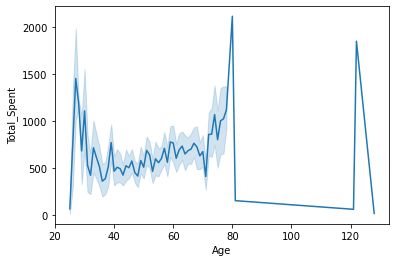

In [451]:
sns.lineplot(data = marketing_data, y = 'Total_Spent', x = 'Age', )

For the age group of 25 - 70 shows a relatively progressive behaviour in purchases, although, there is rising and flowing, then a huge spike on the 80 years customers, then a massive decline and it picks up again at 120 years, then a huge decline, ofcourse the snr group at this stage is either sick or about to die.

In [452]:
# Clarification needed pls

<AxesSubplot:xlabel='Income', ylabel='Total_Spent'>

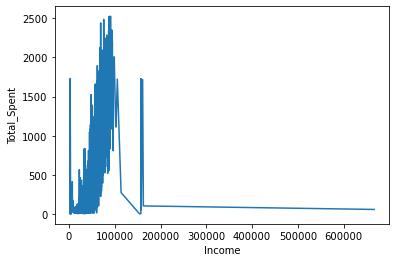

In [453]:
sns.lineplot(data=marketing_data, x='Income', y='Total_Spent')

Customers that earns low salary from a dollar to about 100000 dollars contributed to the Level of cash flow with their purchases in the last 2 years 

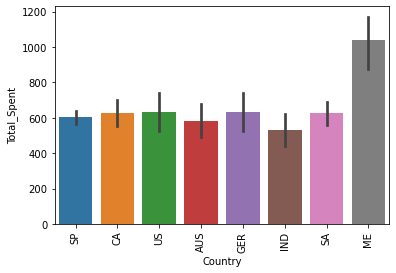

In [454]:
# Best Selling by country
ax = sns.barplot(x = 'Country', y = 'Total_Spent', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Best selling by country by  is Montenegro

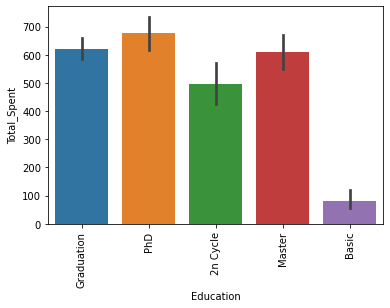

In [455]:
# Best Selling by education class

ax = sns.barplot(x = 'Education', y = 'Total_Spent', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

PhD class purchases more products from the exploratory analysis above

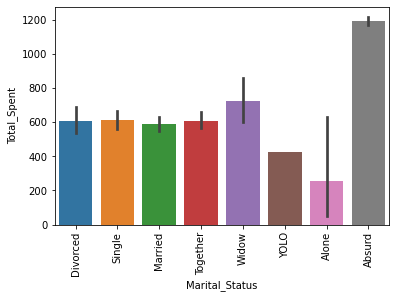

In [456]:
# Best Selling by country
ax = sns.barplot(x = 'Marital_Status', y = 'Total_Spent', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Absurd group purchases more products from the exploratory analysis above

In [457]:
marketing_wine = marketing_data.groupby(['Total_Spent'])['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean().reset_index()

marketing_wine.nlargest(10, 'Total_Spent')

,Total_Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1046,2525,1156.0,120.0,915.0,94.0,144.0,96.0
1045,2524,1259.0,172.0,815.0,97.0,148.0,33.0
1044,2486,1394.0,22.0,708.0,89.0,91.0,182.0
1043,2440,1315.0,22.0,780.0,145.0,0.0,178.0
1042,2352,1083.0,108.0,649.0,253.0,151.0,108.0
1041,2349,1302.0,68.0,731.0,89.0,114.0,45.0
1040,2346,968.0,147.0,842.0,137.0,42.0,210.0
1039,2302,1111.0,24.0,790.0,160.0,45.0,172.0
1038,2283,966.0,168.0,672.0,246.0,105.0,126.0
1037,2279,736.0,63.0,946.0,219.0,189.0,126.0


In [484]:
marketing_wine.nsmallest(1, 'Total_Spent')

,Total_Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5,2.0,1.0,1.0,0.0,0.0,1.0


In [488]:
goods_purchased = marketing_data[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
                                  'MntSweetProducts', 'MntGoldProds' ]]

<AxesSubplot:>

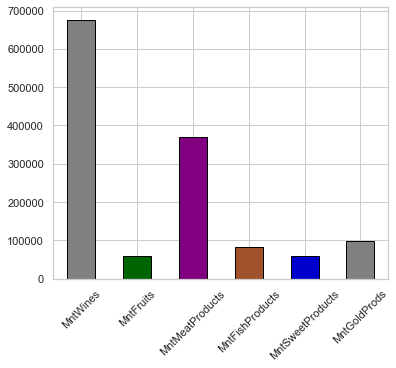

In [490]:
goods_purchased.sum().plot(kind='bar',figsize=(6,5),edgecolor=(0,0,0), color=colors, rot=45)


In [ ]:
#country and goods

 Recency - Number of days since customers' last purchase

In [459]:
last_purchased = marketing_data.groupby(['Recency'])['Age'].mean().reset_index()

last_purchased.nlargest(10, 'Recency')

,Recency,Age
99,99,53.000000
98,98,47.863636
97,97,51.750000
96,96,55.695652
95,95,47.777778
94,94,47.192308
93,93,48.809524
92,92,56.466667
91,91,53.500000
90,90,54.700000


<AxesSubplot:xlabel='Recency', ylabel='Density'>

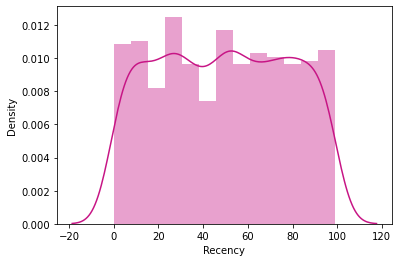

In [460]:
plt.figurefigsize = (10, 5 )
sns.distplot(marketing_data['Recency'], color = 'mediumvioletred')

The last purchased by customers took place from day 1 to 99 day

In [461]:
#sns.distplot(x=['Recency'], y=["Age"], kind="scatter", ax=axes[0])

Best selling product of preference by customers are wines, and the least sold products are MntFishProducts and MntSweetProducts.

Demographic segmentation of this market by performance rate:

Country - Montenegro, 

Age group - 80 years old,

Marital_status- absurd,

Education - PhD class.

### Lifetime of a customer over a period of time

How long the customer has been with the company


In [462]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'])

In [463]:
marketing_data['present_date'] = '2021/02/08'

In [464]:
marketing_data['present_date']  = pd.to_datetime(marketing_data['present_date'])

In [465]:
import datetime as dt

In [466]:
marketing_data['customer_lifetime'] = (marketing_data['present_date'].sub(marketing_data['Dt_Customer']).dt.days.div(365).round(1))

In [467]:
marketing_data.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Total_Spent,present_date,customer_lifetime
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,0,1,0,SP,0,51,1190,2021-02-08,6.7
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,0,1,1,0,CA,0,60,577,2021-02-08,6.7
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,0,US,1,63,251,2021-02-08,6.7
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,0,0,AUS,2,54,11,2021-02-08,6.8
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,0,0,1,0,SP,1,32,91,2021-02-08,6.8
5,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,411,...,0,0,1,0,SP,0,63,1192,2021-02-08,6.9
6,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,252,...,0,0,1,0,GER,0,67,1215,2021-02-08,7.0
7,Graduation,Together,44931.0,0,1,2014-01-18,0,78,0,11,...,0,0,0,0,SP,1,54,96,2021-02-08,7.1
8,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,...,0,0,0,0,US,1,67,544,2021-02-08,7.1
9,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,...,0,0,0,0,IND,1,67,544,2021-02-08,7.1


In [468]:
# Customer life time in years

marketing_data['customer_lifetime'].reset_index()

,index,customer_lifetime
0,0,6.7
1,1,6.7
2,2,6.7
3,3,6.8
4,4,6.8
...,...,...
2211,2235,7.9
2212,2236,8.1
2213,2237,8.2
2214,2238,8.2


Text(0.5, 0, 'Lifetime of a customer over a period of time')

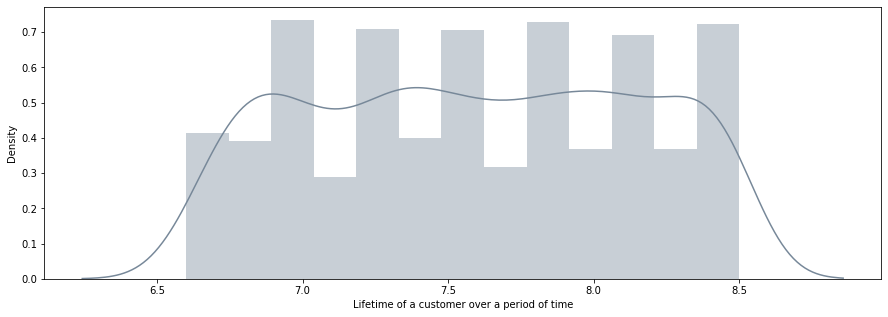

In [469]:
plt.figure(figsize = (15, 5))
sns.distplot(marketing_data['customer_lifetime'], color = 'lightslategray')
plt.xlabel('Lifetime of a customer over a period of time')

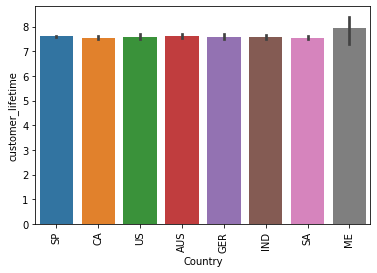

In [470]:
# Best Selling by country
ax = sns.barplot(x = 'Country', y = 'customer_lifetime', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

The average lifetime of custermers per country, shows ME has a longer customer retention and brand loyalty as compared to other customers from other countries.

### Campaign effectiveness and channels analysis

Campaign Channels analysis

In [471]:
# Analyse the campaign effectiveness with their response rate. Campaign + response rate 

In [472]:
marketing_data['Total_Purchases_using_Channels']=(marketing_data['NumDealsPurchases'] + marketing_data['NumWebPurchases'] + marketing_data['NumCatalogPurchases'] + marketing_data['NumStorePurchases'])


In [473]:
marketing_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Children', 'Age', 'Total_Spent',
       'present_date', 'customer_lifetime', 'Total_Purchases_using_Channels'],
      dtype='object')

In [474]:
marketing_data['Total_Campaigns']=(marketing_data['AcceptedCmp3'] + marketing_data['AcceptedCmp4'] + marketing_data['AcceptedCmp5'] + 
                                   marketing_data['AcceptedCmp1'] + marketing_data['AcceptedCmp2'])


In [475]:
marketing_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Complain,Country,Children,Age,Total_Spent,present_date,customer_lifetime,Total_Purchases_using_Channels,Total_Campaigns
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,1,0,SP,0,51,1190,2021-02-08,6.7,15,0
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,1,0,CA,0,60,577,2021-02-08,6.7,18,1
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,US,1,63,251,2021-02-08,6.7,11,0
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,AUS,2,54,11,2021-02-08,6.8,4,0
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,1,0,SP,1,32,91,2021-02-08,6.8,8,1


<AxesSubplot:xlabel='Total_Purchases_using_Channels'>

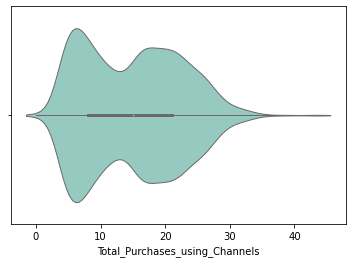

In [476]:
sns.violinplot('Total_Purchases_using_Channels', data = marketing_data, palette="Set3", bw=.2, cut=1, linewidth=1)

In [477]:
#df3['Country'].value_counts().plot(kind='barh', color='gold', edgecolor=(0,0,0))

In [311]:
df = marketing_data[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]

<AxesSubplot:>

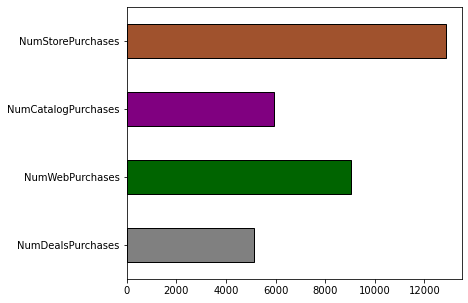

In [478]:
#Which channels are underperforming?

campaign_channels=marketing_data[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']]
colors='gray','darkgreen', 'purple', 'sienna', 'mediumblue'
channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

profitability analysis - this enables the identification of customers who are becoming less profitable, as well as those whose are becoming more valuable and may be ripe for special treatment such as an upgrade in loyalty-card status..

<AxesSubplot:>

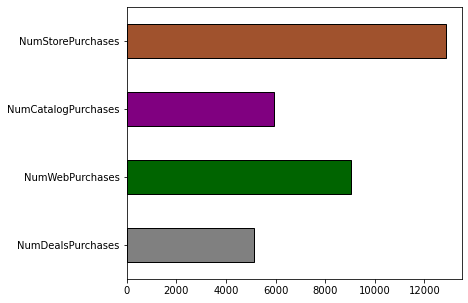

In [396]:
campaign_channels=marketing_data[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
colors='gray','darkgreen', 'purple', 'sienna', 'mediumblue'
channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

In [ ]:
# Success of campaigns against country

# Success of campign 